## NAME: SUGANDHA NEGI
## Organization: The Sparks Foundation
## Data Science and Buisness Analytics Task-2
## Prediction using Unsupervised ML - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Import the libraries required

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
#loading the iris data
iris_db= load_iris()

In [4]:
#storing it in a data frame
iris_df = pd.DataFrame(iris_db.data, columns = iris_db.feature_names)

### Getting Descriptive statistics of our Dataset

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
#storing it as a numpy array
x = np.array(iris_df)
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Performing kmeans and finding the optimum number of clusters to be formed

In [9]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    kms = km.fit(x)
    Sum_of_squared_distances.append(kms.inertia_)

using elbow graph to get the number of clusters to be used for clustering.

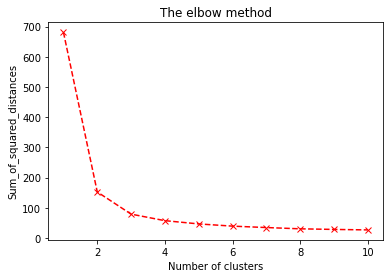

In [10]:
plt.plot(K, Sum_of_squared_distances, 'rx--')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

From the above graph we can say that 3 clusters are to be formed and then perform K-Means on the data iris.

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans_pred = kmeans.fit_predict(x)

Now we plot the graph and show the clusters that are formed after clustering

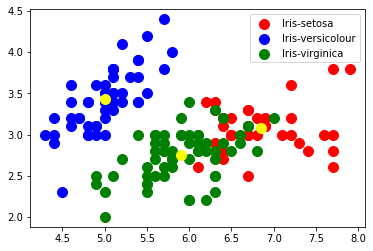

In [12]:

plt.scatter(x[kmeans_pred == 0, 0], x[kmeans_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans_pred == 1, 0], x[kmeans_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans_pred == 2, 0], x[kmeans_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
